In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')


In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM 2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


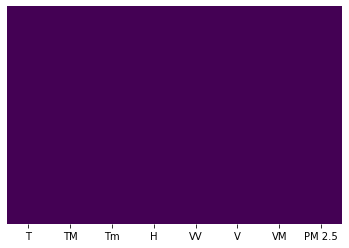

In [4]:
#check for NULL values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#'VM' column has - symbol replacing it with its mean
mean=0
index=[]
count=0
for i in df['VM']:
    if i=='-':
        index.append(count)
    
    else:
        mean+=np.float64(i)
    
    count+=1
        
Mean=mean/(744-len(index))

for i in index:
    df['VM'].iloc[i]=Mean
    

/home/om/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df['VM']=df['VM'].astype('float64',)

In [7]:
#As from above heatmap our dataset is almost clean , so need to write a logic for further cleaning
df=df.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 743
Data columns (total 8 columns):
T         744 non-null float64
TM        744 non-null float64
Tm        744 non-null float64
H         744 non-null int64
VV        744 non-null float64
V         744 non-null float64
VM        744 non-null float64
PM 2.5    744 non-null float64
dtypes: float64(7), int64(1)
memory usage: 52.3 KB


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

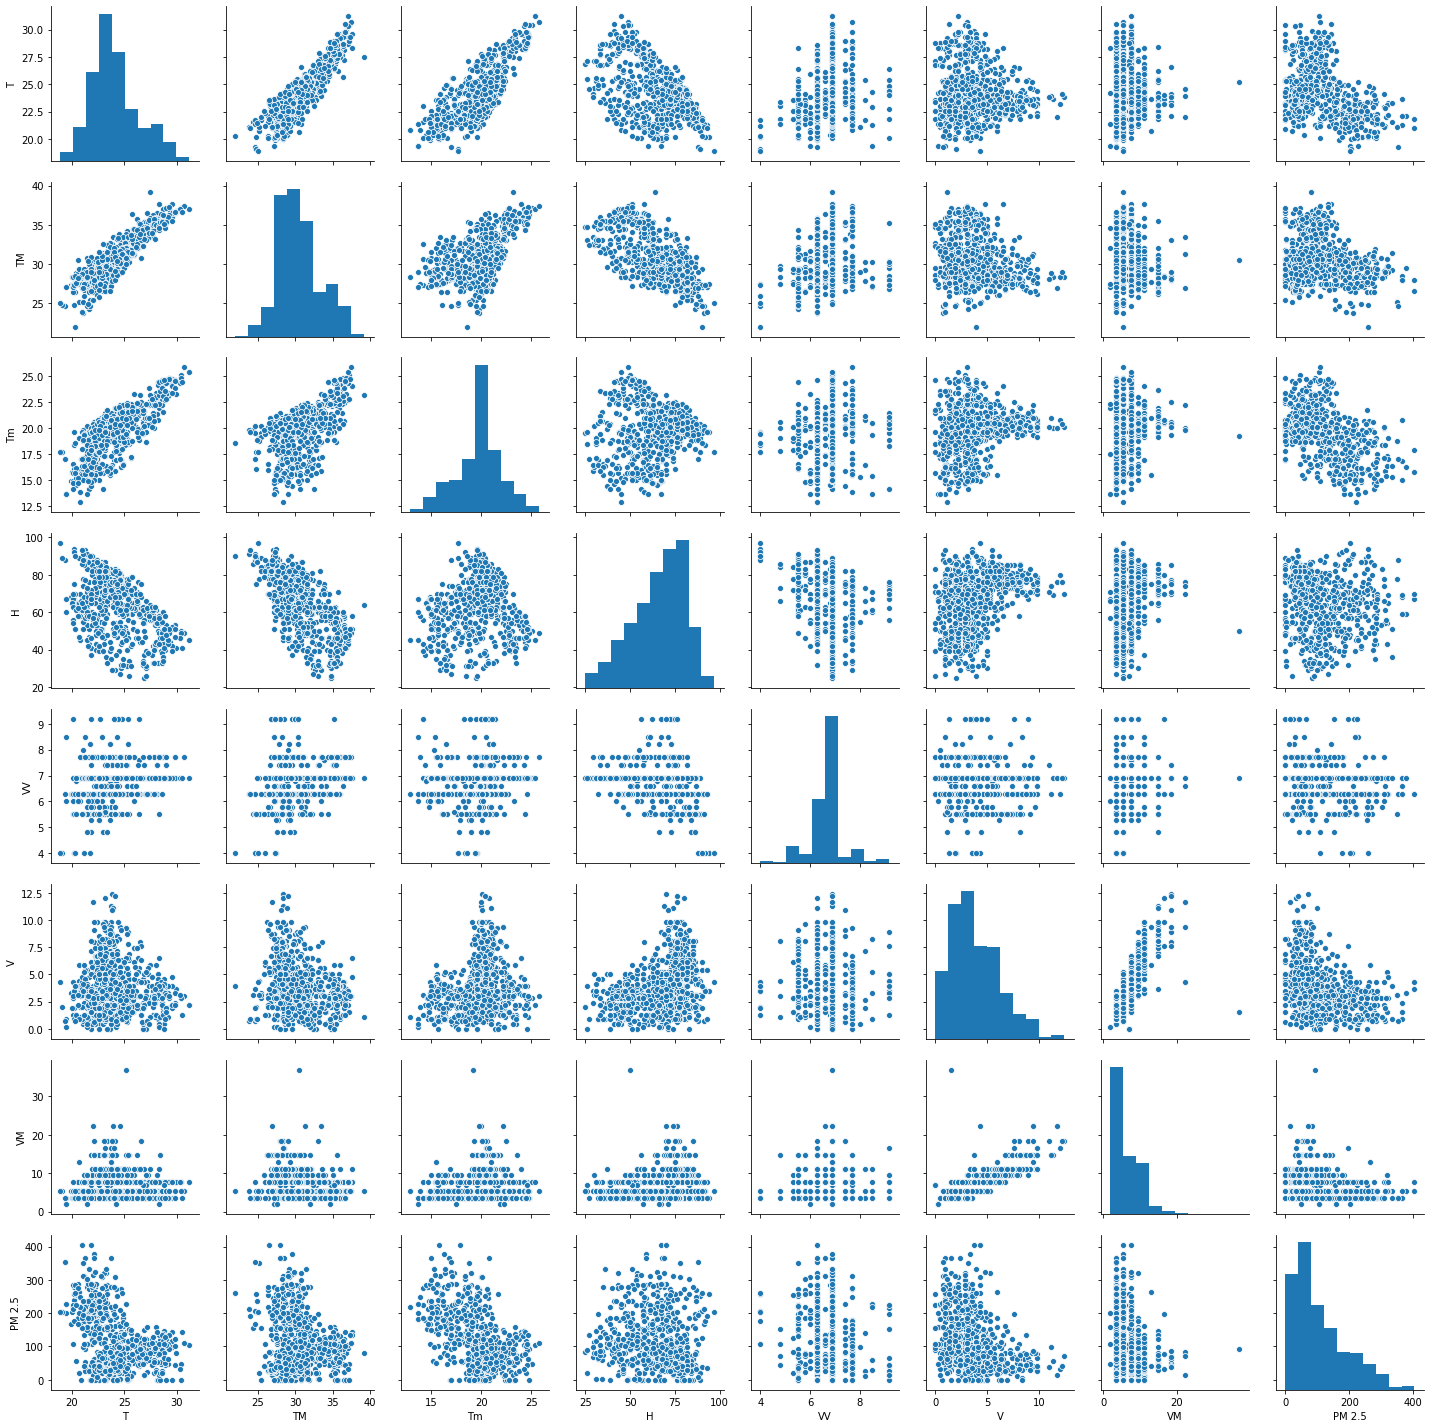

In [10]:
sns.pairplot(df)

In [11]:
#pearson correlation
df.corr()
#Tm is highly related to output

,T,TM,Tm,H,VV,V,VM,PM 2.5
T,1.000000,0.882572,0.772288,-0.481241,0.299514,-0.065034,-0.021489,-0.370169
TM,0.882572,1.000000,0.512205,-0.660918,0.277216,-0.235077,-0.158462,-0.195995
Tm,0.772288,0.512205,1.000000,0.100716,0.102814,0.210526,0.195784,-0.511726
H,-0.481241,-0.660918,0.100716,1.000000,-0.284356,0.381746,0.296204,-0.181399
VV,0.299514,0.277216,0.102814,-0.284356,1.000000,0.018456,0.007738,-0.140826
V,-0.065034,-0.235077,0.210526,0.381746,0.018456,1.000000,0.781677,-0.402922
VM,-0.021489,-0.158462,0.195784,0.296204,0.007738,0.781677,1.000000,-0.338519
PM 2.5,-0.370169,-0.195995,-0.511726,-0.181399,-0.140826,-0.402922,-0.338519,1.000000


## correlation with heatmap

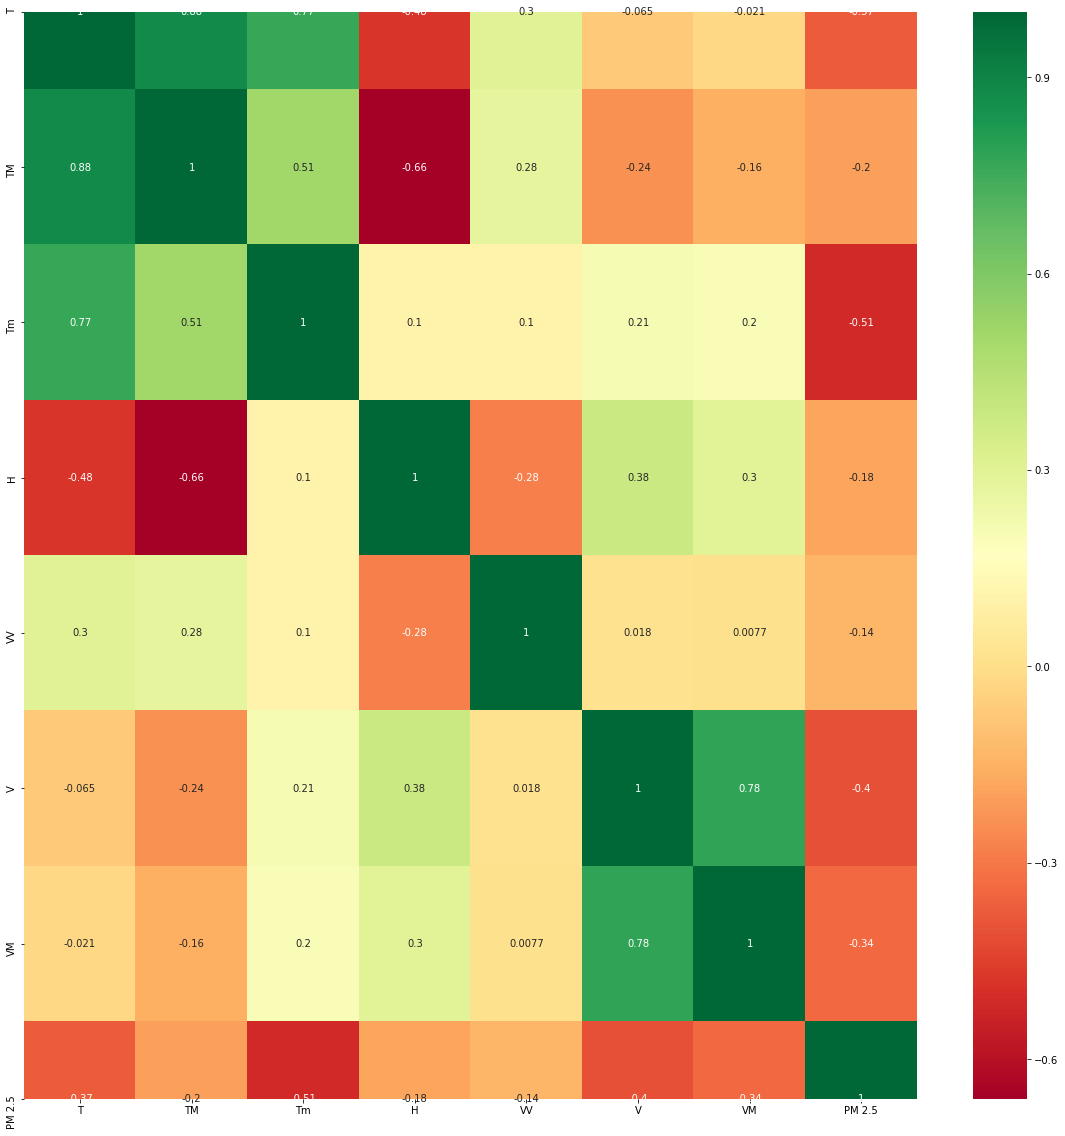

In [12]:
correl=df.corr()
features= correl.index
plt.figure(figsize=(20,20))
sns.heatmap(correl,annot=True,cmap='RdYlGn')

In [13]:
#feature importance using method Tree based Regressor 


In [14]:

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

/home/om/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [15]:
x.head()

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59,6.3,4.3,5.4
1,22.4,30.3,16.9,57,6.9,3.3,7.6
2,24.0,31.8,16.9,51,6.9,2.8,5.4
3,22.8,30.2,17.6,55,7.7,3.7,7.6
4,23.1,30.6,17.4,46,6.9,3.3,5.4


In [16]:
print(model.feature_importances_)


[0.1993609  0.10554251 0.28295373 0.09664759 0.07626027 0.16893796
 0.07029703]


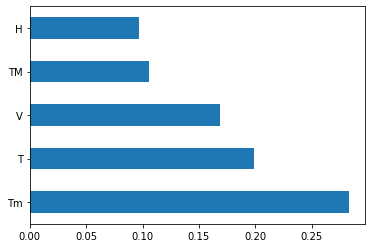

In [17]:
imp_features=pd.Series(model.feature_importances_,index=x.columns)
imp_features.nlargest(5).plot(kind='barh')

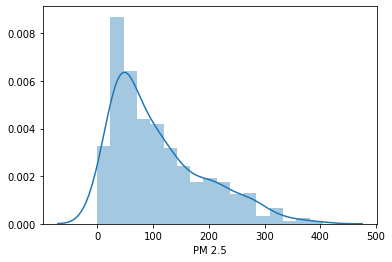

In [18]:
sns.distplot(y)

### Train test split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

## Comparison Linear, Ridge and Lasso Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [26]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,x,y,cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

0.26047909690904325


## Ridge Regression

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV # for cross validation in lasso and ridge

In [30]:
ridge=Ridge()
#parameter always key value pair here
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,cv=5)
ridge_regressor.fit(x,y)

/home/om/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
print(ridge_regressor.best_params_)
#best score is same as mean of mse(mean squared error)
print(ridge_regressor.best_score_)

{'alpha': 40}
0.26205468687699107


## lasso regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV # for cross validation in lasso and ridge

In [38]:
ridge=Lasso()
#parameter always key value pair here
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(ridge,parameters,cv=5)
lasso_regressor.fit(x,y)

/home/om/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193673.8581678912, tolerance: 439.00406538262723
  positive)
/home/om/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 794121.5498777557, tolerance: 393.8926022218312
  positive)
/home/om/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 976411.1892524794, tolerance: 428.4000324092729
  positive)
/home/om/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [39]:
print(lasso_regressor.best_params_)
#best score is same as mean of mse(mean squared error)
print(lasso_regressor.best_score_)

{'alpha': 5}
0.2679397995735439


### Model Evaluation¶


In [40]:
prediction=lasso_regressor.predict(X_test)

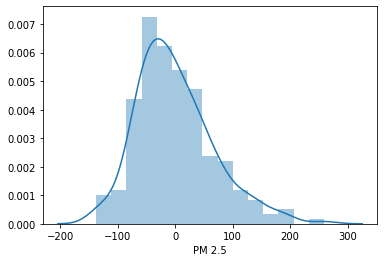

In [42]:
sns.distplot(y_test-prediction)

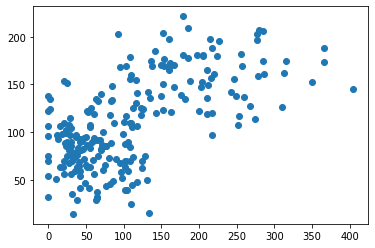

In [43]:
plt.scatter(y_test,prediction)

### Regression Evaluation Metrics

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.05418497428314
MSE: 4481.102314833684
RMSE: 66.94103610517008


In [45]:
import pickle

In [47]:
file=open('lasso_regression_model.pkl','wb')
pickle.dump(lasso_regressor,file)